# **Exploratory Data Analysis over IIT Admission**






**What is exploratory data analysis?**                                                   
Exploratory Data Analysis is an approach to analyzing datasets to summarize their main characteristics that is used in data science. Through it, we can find patterns and explore the relationships between the values that are presented in the data.

**What is the data?**                                                                         
The data that I decided to do an exploratory data analysis over contains 200,000 students who have applied for admissions to Indian Institutes of Technology (IITs). We are going through some of the details which includes area such as the field of study, specialization, fees, and discounts offered to the students. The dataset offers insights into the diverse academic backgrounds, preferences, and financial aspects of the applicants, enabling in-depth analysis of IIT admissions trends.

**Description of the dataset**                                                                
The variables that we have to look through our dataset are the following:

 **Student ID:** Contains the number that can help differentiate the student.                                                          
 **Student Name:**Contains the name of the student corresponding to the ID.   
 **Date of Birth:**Contains the Date of Birth of the student.                        
 **Field of Study:**Contains the major of the student.                                
 **Year of Admission:**Gives when the student got admitted.                                 
 **Expected Year of Graduation:**Gives when the student is graduating.                               
**Current Semester:** Gives how many semester each student completed.                     
**Specialization:**Gives what specification each student does.                                   
**Fees:** Gives what the student owes.                                                
**Discount on Fees:** Gives how much the student gets  discount on fees.

**Download the Datasets from Kaggle**

In [ ]:
pip install opendatasets

In [ ]:
# Providing the Dataset link for downloading.
datasets_url='https://www.kaggle.com/datasets/goyaladi/iit-admissions-dataset'

**Importing Libraries:**                                                         
The next step that we have to do is import the necessary libraries to help us with our data analysis. For my case, I used the following code to import numpy, pandas.

In [ ]:
# importing the Libraries
import opendatasets as od
import os
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [ ]:
od.download(datasets_url)

100%|██████████| 5.09M/5.09M [00:00<00:00, 137MB/s]

In [ ]:
data_dir='/content/iit-admissions-dataset'

In [ ]:
os.listdir(data_dir)

['student_data.csv']

**Loading Datasets**

After importing we read in our data from the csv and examined the structure of our data frame by called .head() and .info() and we get can see this step below along with its output.

In [ ]:
#Load the CSV file into a pandas DataFrame
df=pd.read_csv('/content/iit-admissions-dataset/student_data.csv')

In [ ]:
# Examine the structure of the DataFrame
print(df.head())  # Display the first few rows of the DataFrame
print(df.info())  # Summary information about the DataFrame

   Student ID     Student Name Date of Birth          Field of Study  \
0      165527     Bryan Rogers    2006-01-19        Computer Science   
1      635763      James Hogan    1999-05-23  Mechanical Engineering   
2      740021   David Robinson    1997-12-02       Civil Engineering   
3      433076     Susan Miller    1999-10-30        Computer Science   
4      441628  Brittany Martin    1998-01-10    Chemical Engineering   

   Year of Admission  Expected Year of Graduation  Current Semester  \
0               2020                         2017                 3   
1               2020                         2020                 2   
2               2017                         2022                 1   
3               2021                         2019                 1   
4               2016                         2018                 1   

     Specialization    Fees  Discount on Fees  
0   Web Development  155152             19572  
1  Machine Learning  157870             1476

**Data Information**

In [ ]:
#Gives the statistical Information of the data.
df.describe()

,Student ID,Year of Admission,Expected Year of Graduation,Current Semester,Fees,Discount on Fees
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000
mean,549367.492925,2018.997685,2019.995235,2.499020,125092.847595,12484.258575
std,259361.565011,2.002381,1.997744,1.117804,43287.894903,8788.362629
min,100001.000000,2016.000000,2017.000000,1.000000,50000.000000,0.000000
25%,325311.000000,2017.000000,2018.000000,1.000000,87641.500000,5383.000000
50%,548855.500000,2019.000000,2020.000000,2.000000,125221.000000,10792.500000
75%,774182.500000,2021.000000,2022.000000,3.000000,162597.250000,18154.000000
max,999997.000000,2022.000000,2023.000000,4.000000,200000.000000,39865.000000


In [ ]:
#df.describe(exclude='number').T

In [ ]:
# Display the Total number of rows and columns
df.shape

(200000, 10)

In [ ]:
# Display the columns
df.columns

Index(['Student ID', 'Student Name', 'Date of Birth', 'Field of Study',
       'Year of Admission', 'Expected Year of Graduation', 'Current Semester',
       'Specialization', 'Fees', 'Discount on Fees'],
      dtype='object')

**Data Preprocessing & Cleaning with Pandas**

In [ ]:
selected_columns=['Student ID', 'Student Name', 'Date of Birth', 'Field of Study',
       'Year of Admission', 'Expected Year of Graduation', 'Current Semester',
       'Specialization', 'Fees', 'Discount on Fees']

In [ ]:
len(selected_columns)

10

**Data Extraction**

In [ ]:
#Copy the data set from df to sudent_df
student_df=df.copy()

In [ ]:
student_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 10 columns):
 #   Column                       Non-Null Count   Dtype 
---  ------                       --------------   ----- 
 0   Student ID                   200000 non-null  int64 
 1   Student Name                 200000 non-null  object
 2   Date of Birth                200000 non-null  object
 3   Field of Study               200000 non-null  object
 4   Year of Admission            200000 non-null  int64 
 5   Expected Year of Graduation  200000 non-null  int64 
 6   Current Semester             200000 non-null  int64 
 7   Specialization               200000 non-null  object
 8   Fees                         200000 non-null  int64 
 9   Discount on Fees             200000 non-null  int64 
dtypes: int64(6), object(4)
memory usage: 15.3+ MB


In [ ]:
#Check the unique values for each column
#The nunique() method returns the number of unique values for each column.
df.nunique()

Student ID                     200000
Student Name                   120038
Date of Birth                    3286
Field of Study                      5
Year of Admission                   7
Expected Year of Graduation         7
Current Semester                    4
Specialization                      5
Fees                           110516
Discount on Fees                34738
dtype: int64

In [ ]:
df['Current Semester'].unique()

array([3, 2, 1, 4])

In [ ]:
# check for null values
df.isnull().any()

Student ID                     False
Student Name                   False
Date of Birth                  False
Field of Study                 False
Year of Admission              False
Expected Year of Graduation    False
Current Semester               False
Specialization                 False
Fees                           False
Discount on Fees               False
dtype: bool

* Year of Admission cannot be after the Expected Year of Graduation. So filtered those values out of main data.

In [ ]:
clean_df = df[df['Year of Admission'] < df['Expected Year of Graduation']]

In [ ]:
clean_df

,Student ID,Student Name,Date of Birth,Field of Study,Year of Admission,Expected Year of Graduation,Current Semester,Specialization,Fees,Discount on Fees
2,740021,David Robinson,1997-12-02,Civil Engineering,2017,2022,1,Network Security,55662,5871
4,441628,Brittany Martin,1998-01-10,Chemical Engineering,2016,2018,1,Network Security,125934,14871
5,837685,Melody Payne,1997-12-15,Mechanical Engineering,2016,2019,4,Web Development,131633,7565
8,851589,Cassandra Johnson,1999-09-11,Chemical Engineering,2019,2020,1,Network Security,89571,16943
9,880448,Jonathan Ali,2006-03-31,Mechanical Engineering,2019,2020,4,Artificial Intelligence,61165,5748
...,...,...,...,...,...,...,...,...,...,...
199995,220556,Kelly Bradley,2001-06-06,Electrical Engineering,2017,2021,4,Data Science,164149,4246
199996,957592,Jacob Smith,2003-12-15,Electrical Engineering,2017,2019,3,Web Development,135184,12729
199997,786798,Nicole Davis,2000-07-27,Chemical Engineering,2022,2023,1,Data Science,139430,18237
199998,142498,Natasha Rosales,2001-02-16,Civil Engineering,2017,2018,1,Data Science,73117,6946


In [ ]:
pd.crosstab(clean_df['Year of Admission'], clean_df['Field of Study'])

Field of Study,Chemical Engineering,Civil Engineering,Computer Science,Electrical Engineering,Mechanical Engineering
Year of Admission,,,,,
2016,5728,5755,5763,5745,5655
2017,4967,4970,4855,4986,4923
2018,4076,4034,4061,4069,4124
2019,3310,3204,3163,3304,3333
2020,2458,2412,2330,2430,2454
2021,1653,1605,1620,1653,1644
2022,817,809,826,796,821


In [ ]:
# Displays the no.of counts in each field.
clean_df['Field of Study'].value_counts()

Chemical Engineering      23009
Electrical Engineering    22983
Mechanical Engineering    22954
Civil Engineering         22789
Computer Science          22618
Name: Field of Study, dtype: int64

In [ ]:
# Displays the no.of counts in each field.
clean_df['Year of Admission'].value_counts()

2016    28646
2017    24701
2018    20364
2019    16314
2020    12084
2021     8175
2022     4069
Name: Year of Admission, dtype: int64

In [ ]:
# to check the duplicate value

duplicate=clean_df.duplicated()
print(duplicate)

2         False
4         False
5         False
8         False
9         False
          ...  
199995    False
199996    False
199997    False
199998    False
199999    False
Length: 114353, dtype: bool


In [ ]:
# change type object to to_datetime

clean_df['Date of Birth']=pd.to_datetime(clean_df['Date of Birth'])
print(clean_df['Date of Birth'])

2        1997-12-02
4        1998-01-10
5        1997-12-15
8        1999-09-11
9        2006-03-31
            ...    
199995   2001-06-06
199996   2003-12-15
199997   2000-07-27
199998   2001-02-16
199999   2005-10-17
Name: Date of Birth, Length: 114353, dtype: datetime64[ns]


**Exploratory Analysis and Visualization**




**Data visualization**                                                           
Data Visualisation is a graphical representation of information and data. By using different visual elements such as charts, graphs, and maps data visualization tools provide us with an accessible way to find and understand hidden trends and patterns in data.

**Need for visualizing data :**  
* Understand the trends and patterns of data.
* Analyze the frequency and other such characteristics of data.
* Know the distribution of the variables in the data.
* Visualize the relationship that may exist between different variables

The number of variables of interest featured by the data classifies it as univariate, bivariate, or multivariate.

***Univariate Analysis**                                              
Univariate Analysis is a type of data visualization where we visualize only a single variable at a time. Univariate Analysis helps us to analyze the distribution of the variable present in the data so that we can perform further analysis.

***Bivariate analysis:**  
Bivariate analysis is the simultaneous analysis of two variables. It explores the concept of the relationship between two variable whether there exists an association and the strength of this association or whether there are differences between two variables and the significance of these differences.

***Multivariate Analysis:**
It is an extension of bivariate analysis which means it involves multiple variables at the same time to find correlation between them. Multivariate Analysis is a set of statistical model that examine patterns in multidimensional data by considering at once, several data variable.

**Histogram:**
Here we’ll be performing univariate analysis on Numerical variables using the histogram function.

**Bar Chart:**
Univariate analysis of categorical data. We’ll be using the count plot function from the seaborn library.

**Pie Chart**
A piechart helps us to visualize the percentage of the data belonging to each category.

In [ ]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
sns.set_style('whitegrid')

**Univariate Analysis**

 **1.Plotting chart for students based on Year of Admission.**

Text(0.5, 1.0, 'Students Based on Year of Admission')

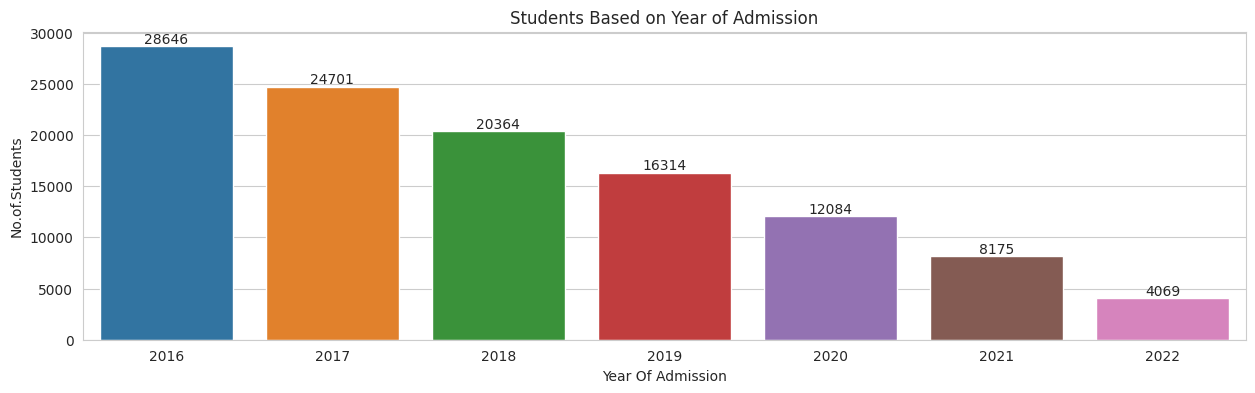

In [ ]:
plt.figure(figsize=(15,4))
ax = sns.countplot(x = 'Year of Admission',data = clean_df)
for bars in ax.containers:
    ax.bar_label(bars)
plt.xlabel('Year Of Admission')
plt.ylabel('No.of.Students')
plt.title('Students Based on Year of Admission')

**Explaination:**
The above charts shows IIT Admission details per year.
The no.of students along Y axis & Year of admission along X axis.
It shows around 28646 no.of students have taken admisssion in 2016,
24701 no.of students in 2017,20364 no.of students in 2018,16314 no.of students in 2019,12084 no.of students in 2020,8175 no.of students in 2021 and 4069 no.of students in 2022.

**Question 1:**
**How many Students have taken admission in 2018?**

In [ ]:
clean_df['Year of Admission'].value_counts()


2016    28646
2017    24701
2018    20364
2019    16314
2020    12084
2021     8175
2022     4069
Name: Year of Admission, dtype: int64

**There are  20364 students have taken admission in 2018.**

**Question 2: Calculate Total no.of Students have taken admission from 2016 to 2022?**

In [ ]:
total=clean_df['Year of Admission'].value_counts().sum()
print('Total no.Of students have taken admission from 2016 to 2022 is',total)

Total no.Of students have taken admission from 2016 to 2022 is 114353


**2.Plotting Chart for Students Based on Field of Study.**

Text(0.5, 1.0, 'Students Based on Field of Study.')

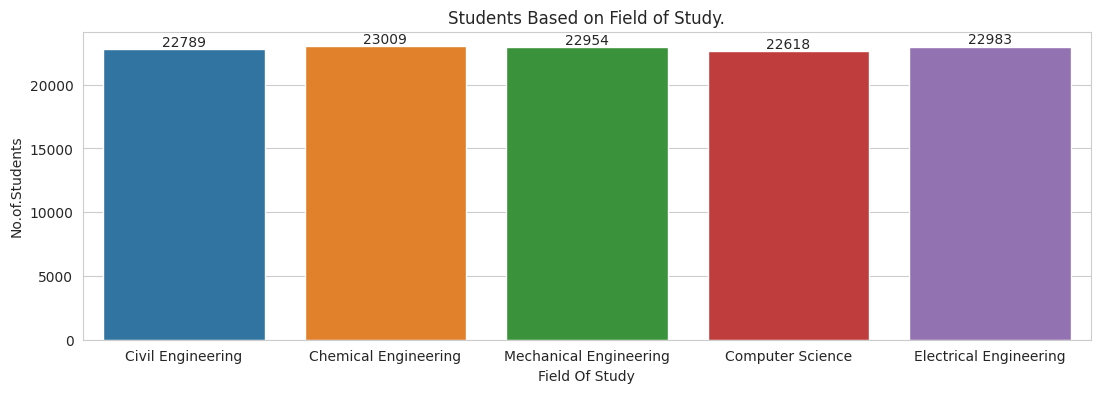

In [ ]:
plt.figure(figsize=(13,4))
ax = sns.countplot(x = 'Field of Study',data = clean_df)
for bars in ax.containers:
    ax.bar_label(bars)

plt.xlabel('Field Of Study')
plt.ylabel('No.of.Students')
plt.title('Students Based on Field of Study.')

**Explaination:**
The above chart shows the students based on Field of study. Field Of Study is taken along X axis & No.of students taken along Y axis.
* 22789 students are in Civil Engineering.
* 23009 students are in Chemical Engineering.
* 22954 students are in Mechanical Engineering.
* 22618 students are in Computer Science.
* 22983 students are in Electrical Engineering.




**Question 3:How many students are enrolled in Computer science department?**



In [ ]:
clean_df['Field of Study'].value_counts()

Chemical Engineering      23009
Electrical Engineering    22983
Mechanical Engineering    22954
Civil Engineering         22789
Computer Science          22618
Name: Field of Study, dtype: int64

In [ ]:
print('There are 22618 students in Computer Science Department')

There are 22618 students in Computer Science Department


**Question 4: Which department has the maximum no.of students.?**

In [ ]:
clean_df['Field of Study'].value_counts().max()

23009

In [ ]:
print('The Chemical Engineering department has maximum no.of students 23009')

The Chemical Engineering department has maximum no.of students 23009


**3. Plotting chart for Students Based on Specialization.**

Text(0.5, 1.0, 'Students Based on Specialization.')

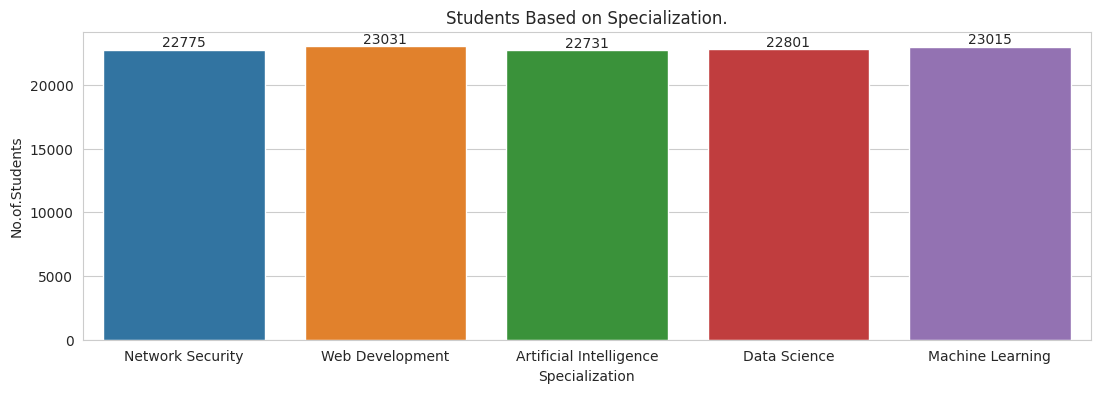

In [ ]:
plt.figure(figsize=(13,4))
ax = sns.countplot(x = 'Specialization',data = clean_df)
for bars in ax.containers:
    ax.bar_label(bars)

plt.xlabel('Specialization')
plt.ylabel('No.of.Students')
plt.title('Students Based on Specialization.')

**4.Plotting chart for Students Based on Year of Birth.**

Text(0.5, 0, 'Year of Birth')

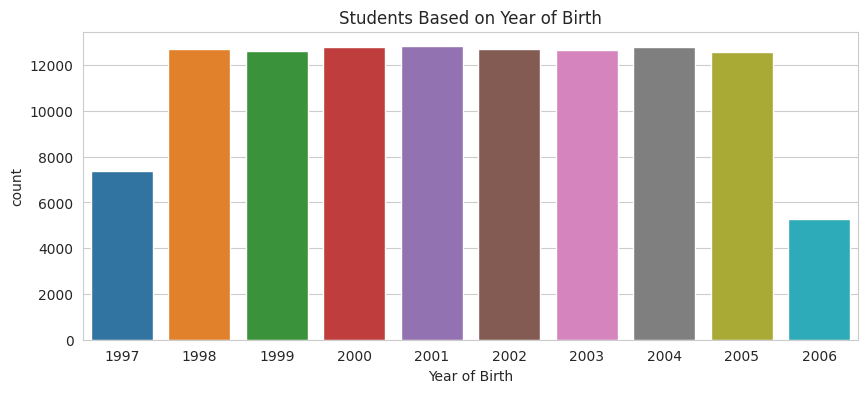

In [ ]:
plt.figure(figsize=(10,4))
sns.countplot(x=clean_df['Date of Birth'].dt.year)
plt.title('Students Based on Year of Birth')
plt.xlabel('Year of Birth')

**Explaination:**
The above chart shows the students based on Specialization. Specialization is taken along X axis & No.of students taken along Y axis.
* 22789 students are in Network Security.
* 23009 students are in Web Development.
* 22954 students are in Data Science.
* 22618 students are in Artificial Intelligence.
* 22983 students are in Machine Learning.


**5.Plotting chart for Percentage of Students Based on Specialization.**

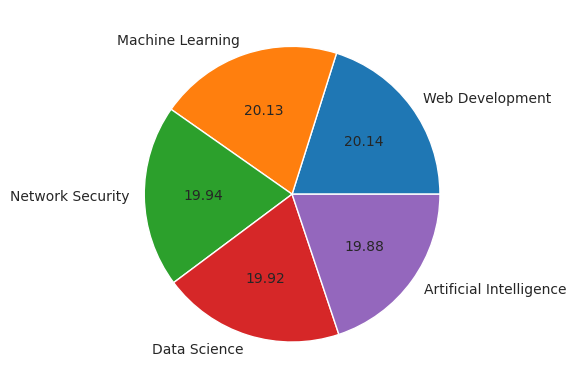

In [ ]:
weightage = clean_df['Specialization'].value_counts()
plt.pie(weightage,labels=['Web Development','Machine Learning','Network Security','Data Science','Artificial Intelligence'],autopct='%.2f')
plt.show()

In [ ]:
#clean_df['Specialization'].value_counts()


**Question 5: Findout Which specialization has been less enrolled by students.**

In [ ]:
clean_df['Specialization'].value_counts().min()
print('The Artificial Intelligence has been less enrolled by students = 22731')

The Artificial Intelligence has been less enrolled by students = 22731


**Question 6:How many students are currently enrolled in each specialization?**

In [ ]:
clean_df['Specialization'].value_counts()

Web Development            23031
Machine Learning           23015
Data Science               22801
Network Security           22775
Artificial Intelligence    22731
Name: Specialization, dtype: int64

**Question 7:How many students are in each semester?**

In [ ]:
clean_df['Current Semester'].value_counts().sort_values()

4    28447
2    28581
3    28621
1    28704
Name: Current Semester, dtype: int64

<Axes: xlabel='Current Semester', ylabel='count'>

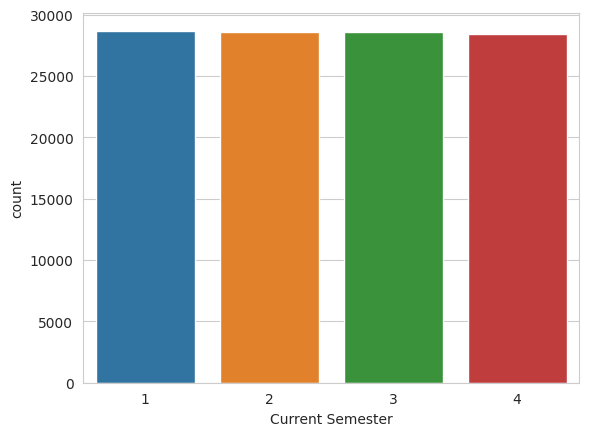

In [ ]:
sns.countplot(clean_df ,x = 'Current Semester')

**Question 8:Find Top Fees Payer in IIT.**

In [ ]:
top_fees_payer= pd.DataFrame(clean_df[['Student Name','Fees','Field of Study' , 'Current Semester']].sort_values( ascending = False , by = 'Fees'))[0:5]

In [ ]:
top_fees_payer

,Student Name,Fees,Field of Study,Current Semester
145493,Jonathan Simmons,200000,Electrical Engineering,3
36585,Anthony Anderson,199999,Chemical Engineering,4
154209,Jennifer Wright,199998,Electrical Engineering,4
158012,Julie Jones,199998,Civil Engineering,2
182283,Beth Thompson,199996,Electrical Engineering,4


**Question 9: Find the which department student has paid the highest fees in IIT.**

In [ ]:
top_fees_payer.max()

Student Name                   Julie Jones
Fees                                200000
Field of Study      Electrical Engineering
Current Semester                         4
dtype: object

In [ ]:
print("Electrical Engineering Student has paid the highest fees in IIT")

Electrical Engineering Student has paid the highest fees in IIT


**DISCOUNT PERCENTAGE**

In [ ]:
df['Discount_percent'] = clean_df['Discount on Fees']/clean_df['Fees'] * 100
print(df['Discount_percent'])

0               NaN
1               NaN
2         10.547591
3               NaN
4         11.808566
            ...    
199995     2.586674
199996     9.416055
199997    13.079682
199998     9.499843
199999     8.171258
Name: Discount_percent, Length: 200000, dtype: float64


**6. Plotting the chart for the Fees Analysis of the students**

<Axes: xlabel='Fees', ylabel='Count'>

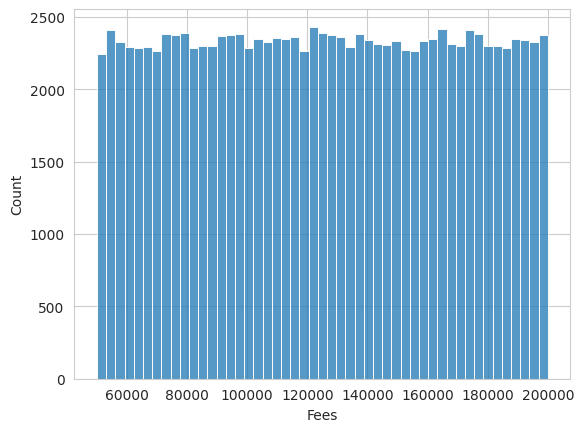

In [ ]:
sns.histplot(clean_df['Fees'])

**Bivariate analysis:**

**7. Plotting the Discount percent vs Field of study**

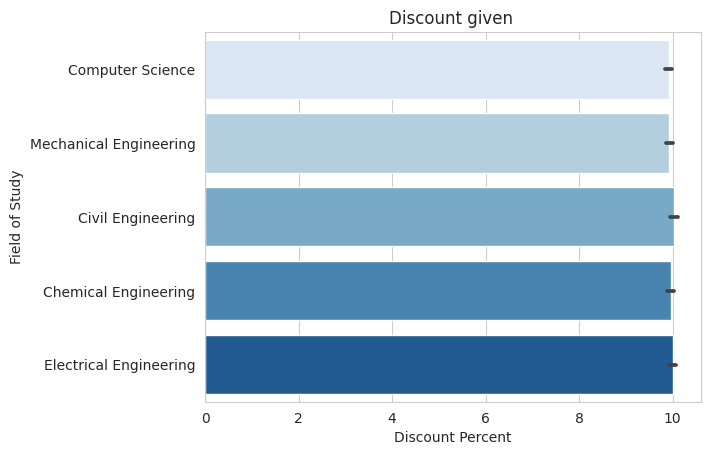

In [ ]:
sns.barplot(x = 'Discount_percent',y = 'Field of Study',data=df, palette = "Blues")
plt.title('Discount given ')
plt.xlabel('Discount Percent')
plt.ylabel('Field of Study')
plt.show()


**8. Plotting the Discount percent vs Field of study of current semester**

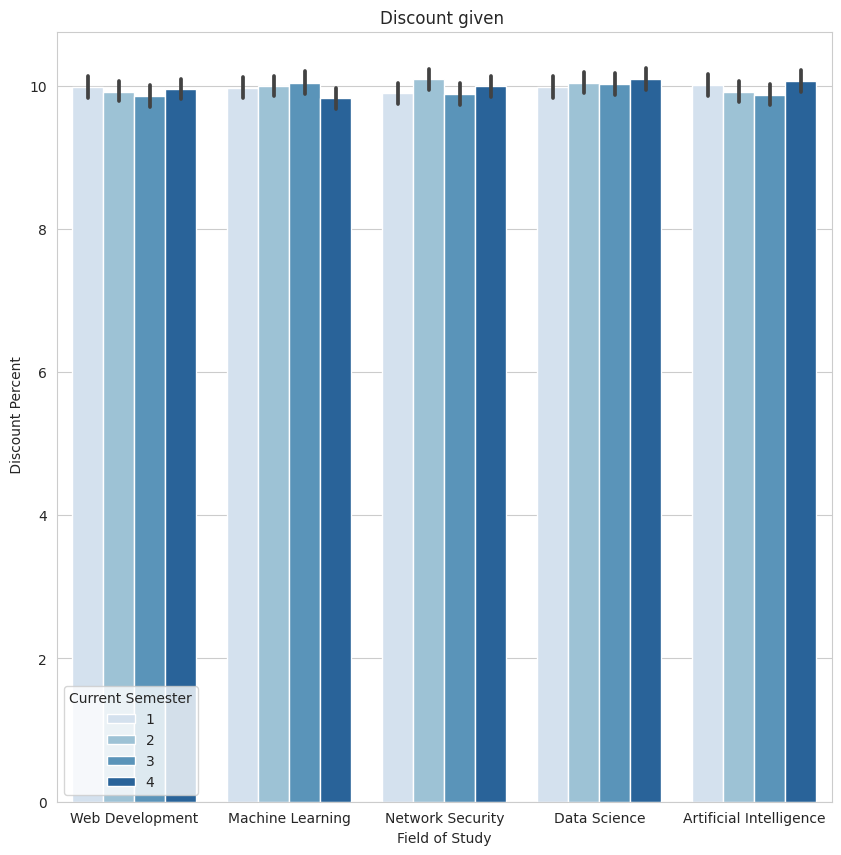

In [ ]:
plt.figure(figsize=(10,10))
sns.barplot(x = 'Specialization',y = 'Discount_percent',hue='Current Semester',data = df,palette = "Blues")
plt.title('Discount given ')
plt.xlabel('Field of Study')
plt.ylabel(' Discount Percent')
# plt.legend()
plt.show()


**Question 10 Find the Maximum Discount_Percent on fees**

In [ ]:
df['Discount_percent'].max()

20.0

**Question 11.Find the Top Course selected by Students in IIT.**

In [ ]:
spec_dataset =pd.DataFrame(clean_df['Specialization'].value_counts())

In [ ]:
spec_dataset

,Specialization
Web Development,23031
Machine Learning,23015
Data Science,22801
Network Security,22775
Artificial Intelligence,22731


**Web devolopment and Machine Learning is the top selected course taken by students in IIT.**

**9.Plotting chart for Field of Study vs Fees**

Text(0.5, 1.0, 'Field of Study vs Fees')

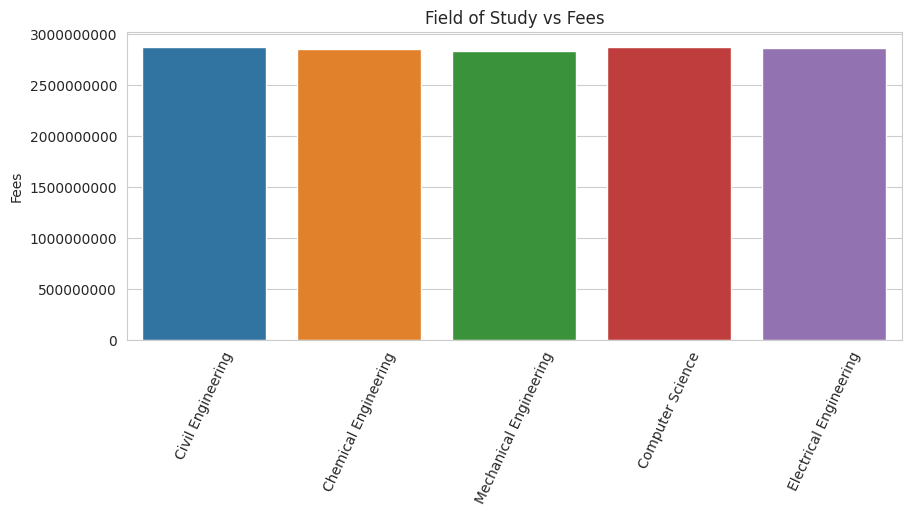

In [ ]:
plt.figure(figsize=(10,4))
plt.ticklabel_format(style='plain')
sns.barplot(x=clean_df['Field of Study'].unique(),y=clean_df.groupby('Field of Study').sum()['Fees'])
plt.xticks(rotation=65)
plt.title('Field of Study vs Fees')

**10.Plotting chart for Fees vs Discount on Fees**

Text(0.5, 1.0, 'Fees vs Discount on Fees')

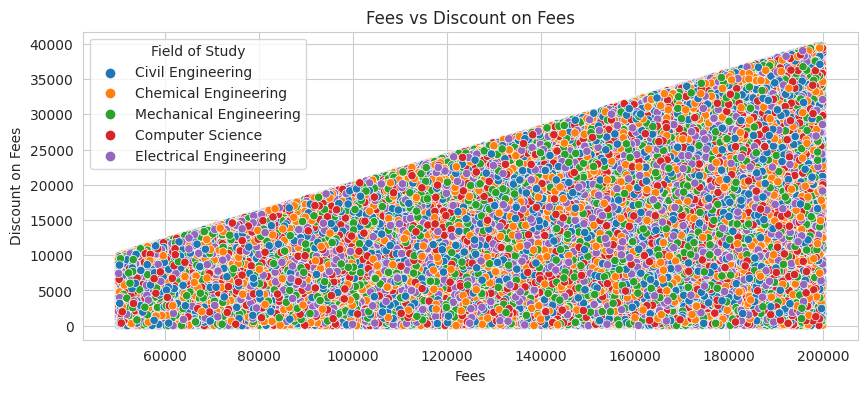

In [ ]:
plt.figure(figsize=(10,4))
sns.scatterplot(x=clean_df['Fees'], y=clean_df['Discount on Fees'], hue=clean_df['Field of Study'])
plt.title('Fees vs Discount on Fees')

**11.Plotting Chart for Field of Study vs Specialization**

Text(0.5, 1.0, 'Field of Study vs Specialization')

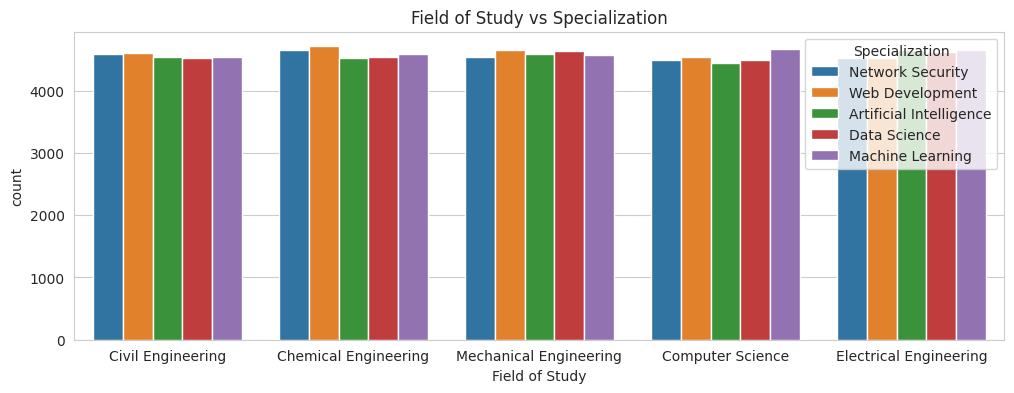

In [ ]:
plt.figure(figsize=(12,4))
sns.countplot(x=clean_df['Field of Study'], hue=clean_df['Specialization'])
plt.title('Field of Study vs Specialization')

**12.Plotting chart for Year of Admission vs Fees**
       

Text(0.5, 1.0, 'Expected Year of Graduation vs Fees')

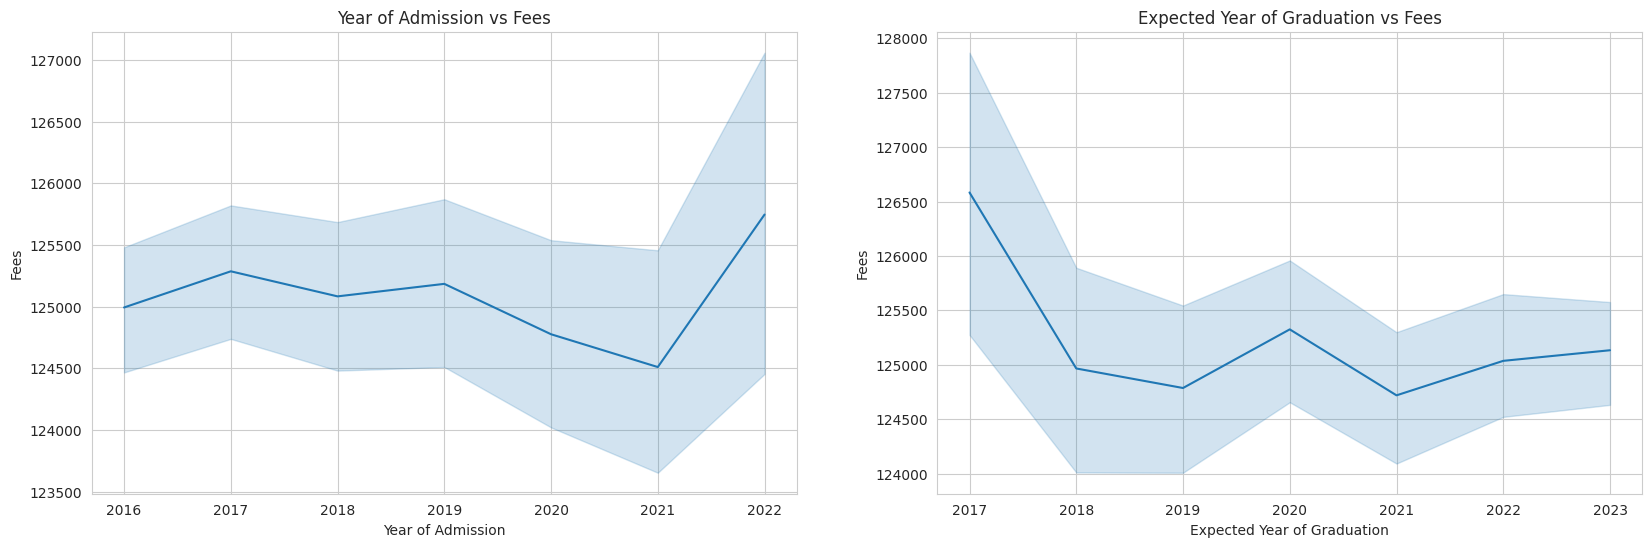

In [ ]:
plt.figure(figsize = (20,6))
plt.subplot(1,2,1)
sns.lineplot(x = 'Year of Admission',y='Fees',data=clean_df)
plt.title('Year of Admission vs Fees')
plt.subplot(1,2,2)
sns.lineplot(x = 'Expected Year of Graduation',y='Fees',data=clean_df)
plt.title('Expected Year of Graduation vs Fees')

**Multivariate Analysis:**

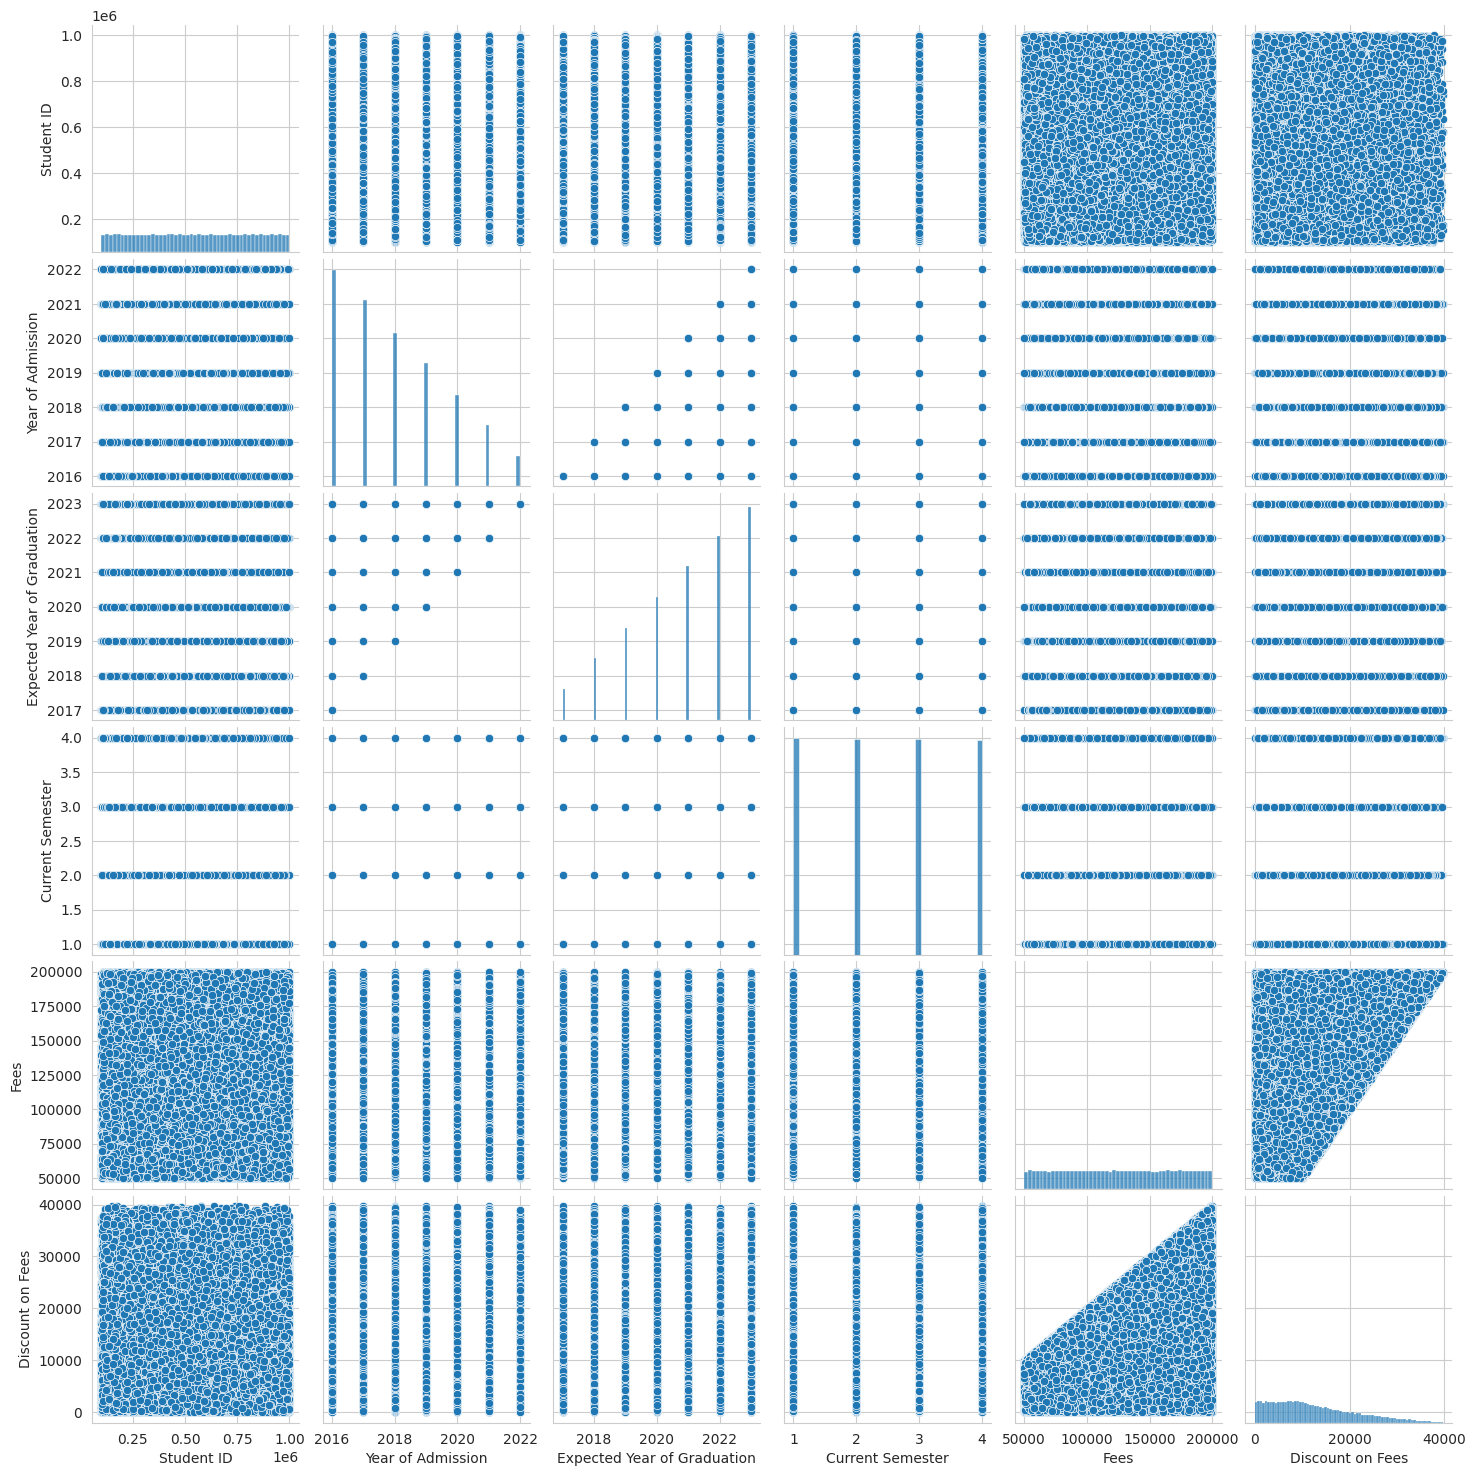

In [ ]:
sns.pairplot(clean_df)

# **Observations:**

* Every field of study has almost same students the maximum in Electrical Engineering with 10183 while the minimum in Civil Engineering with 9918 students.

* Students are looking every field for specialization but Web Development and Machine Learning are little above than others.

* We can see that students admissions are declining each and every year.

* There is a yearly rise in students who are expected to gradute.

* There is almost equal number of students in 2nd, 3rd and 4th semester whereas a little less students in 1st semester.

* Fees is showing quite big ups and downs based on the Year of Admission of students.
* Fees of Computer Science and Civil Engineering is higher than other courses.
* Fees and Discount on fees has a clear connection where higher fees has high discount and vice-versa.
* Students from every course are moving towards a specialization course but students from Chemical Engieering are on top in choosing specialization course.

* Highest discount on fees is received in 2017 and lowest are in 2016 and 2018 while other years it is just some up and down.

# **Conclusion:**

From our analysis of the Admissions at IIT, we can see that there is a even spread between all the students in relatively all of the fields of our data. The fees and discounts were stable among each of the different options as well as there being a stable spread between the fees between each of the different fields. This concludes the exploratory data analysis of IIT admissions.
